# Einführung in Machine Learning mit SKlearn - Iris Classification
In dieser Übung möchten wir eines der berühmtesten Datasets für Machine Learning verwenden, um uns mit den ersten Methoden von SKlearn vertraut zu machen. Das Iris Dataset wurde vom britischen Wissenschaftler Ronald Fisher im Jahr 1936 eingeführt und ist eines der ersten Datensätze für das Erlernen von Machine Learning Methoden.
Für weitere Informationen bzgl. des Datensatzes schaut bitte auf https://en.wikipedia.org/wiki/Iris_flower_data_set. 

## 1.Start
Zunächst laden wir unsere benötigten Python Pakete.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import numpy as np

In [2]:
# laden des iris Datensatzes
iris = datasets.load_iris()

Bei dem Iris Datensatz handelt es sich um ein sklearn spezifisches Objekt für Datensätze. Als nächstes müssen wir die Daten extrahieren, um anschließend ein Dataframe zu erzeugen.

In [3]:
# Extrahieren der Features
featuresCol_names = iris.feature_names
features_data = iris.data

# Extrahieren des Targets
targetCol_name = iris.target_names
target_data = iris.target

Nun können wir ein Dataframe erstellen

In [4]:
# Erstellung des Dataframes
irisDF = pd.DataFrame(data=features_data, columns=featuresCol_names)

# Anhängen der Target Spalte
irisDF.loc[:,'target'] = target_data

In [6]:
irisDF.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
target_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. Data Understanding and Data Exploration

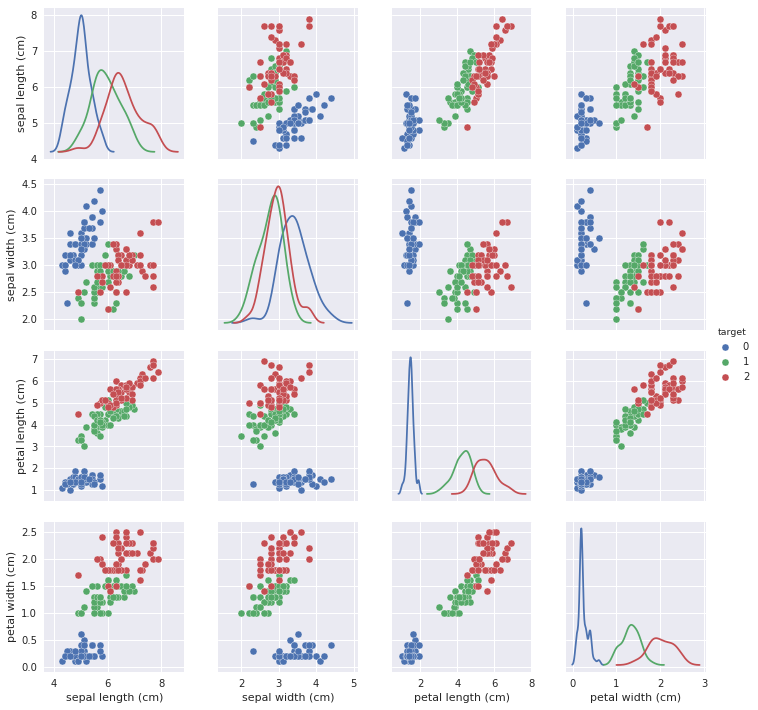

In [27]:
% matplotlib inline
sns.pairplot(data=irisDF, vars=irisDF.drop('target', axis=1).columns.tolist(), hue='target', diag_kind='kde')

In [28]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Binärer Classifier
Der Irisdatensatz besteht eigentlich aus drei verschiedenen target labels. Wir wollen jedoch zunächst einen Binären Classifier trainieren. Die Zielgröße wird sein: 1 oder sonst. Hierfür hängen wir eine neue Spalte an unser Dataframe.

In [29]:
irisDF['binaryLabel'] = np.where(irisDF['target'] == 2, 0, irisDF['target'])

In [30]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,binaryLabel
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,1.000000


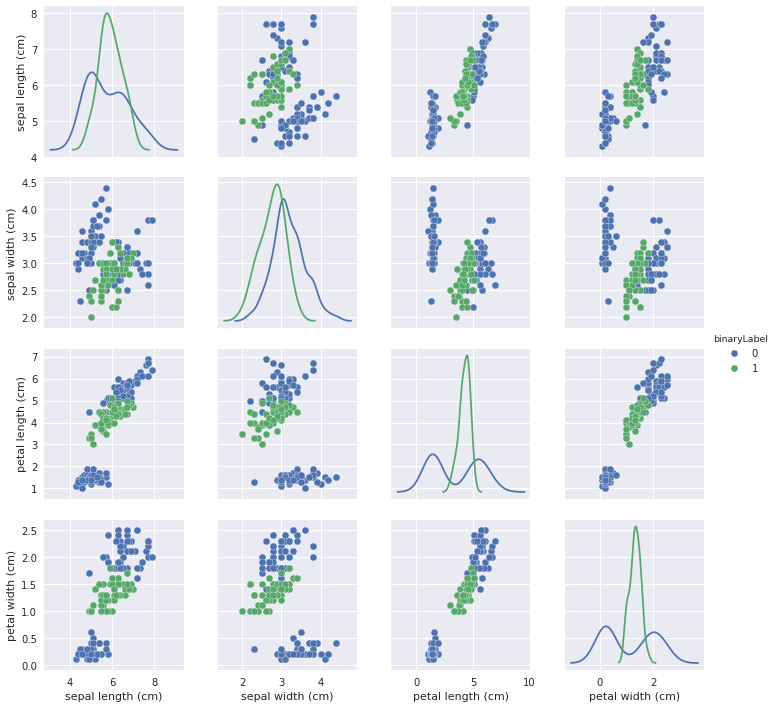

In [31]:
% matplotlib inline
sns.pairplot(data=irisDF, vars=irisDF.drop(['target', 'binaryLabel'], axis=1)\
             .columns.tolist(), hue='binaryLabel', diag_kind='kde')

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# aufspalten in idependent und dependent features
features = irisDF.drop(['target', 'binaryLabel'], axis=1)
target = irisDF['binaryLabel']

In [34]:
#aufspalten in training und testdaten
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
clf_tree = DecisionTreeClassifier(max_depth=2)

## Visualisierung des Baums

In [67]:
from sklearn.tree import export_graphviz

In [68]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [69]:
clf_tree.score(X_test, y_test)

0.97999999999999998

In [74]:
y_train.describe()

count    100.000000
mean       0.350000
std        0.479372
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: binaryLabel, dtype: float64

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, clf_tree.predict(X_test))

array([[34,  1],
       [ 0, 15]])

In [75]:
confusion_matrix(y_train, clf_tree.predict(X_train))

array([[61,  4],
       [ 1, 34]])

In [73]:
export_graphviz(clf_tree, out_file='tree.dot', feature_names=features.columns.tolist())

In [41]:
import numpy as np

In [42]:
pd.DataFrame(np.where(irisDF.target == 1, 1, 0)).describe()

,0
count,150.000000
mean,0.333333
std,0.472984
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
nn = KNeighborsClassifier()

In [45]:
nn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
confusion_matrix(y_test, nn.predict(X_test))

array([[34,  1],
       [ 0, 15]])